In [9]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import glob

from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
window_size = 5

def moving_average(x, window_size=window_size):
    return np.convolve(x, np.ones(window_size)/window_size, mode='valid')


def find_sign_change_step(steps, values):
    # Compute numerical derivative
    derivatives = np.diff(values)
    signs = np.sign(derivatives)

    # Look for sign changes
    for i in range(1, len(signs)):
        if signs[i] != 0 and signs[i] != signs[i - 1]:
            return steps[i + window_size - 1]  # Adjust index because of moving average window
    return None

In [11]:
ratios_fp6_e2m3_fp6_e3m2 = [62.08117, 83.29887, 113.2144, 156.01372]

# ratios_fp6_e3m2_fp6_e3m2 = [42.36739, 62.40892, 93.80541, 144.13805]
# 

In [12]:
csv_files = glob.glob("data/training_loss/fp6_e2m3_fp6_e3m2/*.csv")  # or provide a list manually

In [13]:
csv_files 

['data/training_loss/fp6_e2m3_fp6_e3m2/wandb_export_fp6_e2m3_fp6_e3m2_3.csv',
 'data/training_loss/fp6_e2m3_fp6_e3m2/wandb_export_fp6_e2m3_fp6_e3m2_4.csv',
 'data/training_loss/fp6_e2m3_fp6_e3m2/wandb_export_fp6_e2m3_fp6_e3m2_2.csv',
 'data/training_loss/fp6_e2m3_fp6_e3m2/wandb_export_fp6_e2m3_fp6_e3m2_1.csv']

[5.0546875  4.34179688 4.22851562 ... 5.09375    5.01953125 5.0625    ]
smoothed [4.3578125  4.13730469 4.03984375 ... 5.040625   5.04414062 5.04101562]
[5.08007812 4.3671875  4.25       ... 5.9609375  5.96875    5.984375  ]
smoothed [4.37851563 4.15253906 4.0515625  ... 6.02070313 6.00625    5.99648438]
[4.88476562 4.36523438 4.26171875 ... 6.23632812 4.28515625 4.10253906]
smoothed [4.353125   4.15488281 4.04707031 ... 6.09804688 5.74921875 5.35605469]
[4.58789062 4.37304688 4.28125    ... 6.08398438 6.11132812 6.140625  ]
smoothed [4.30546875 4.18945312 4.09570313 ... 6.13789062 6.12890625 6.1390625 ]


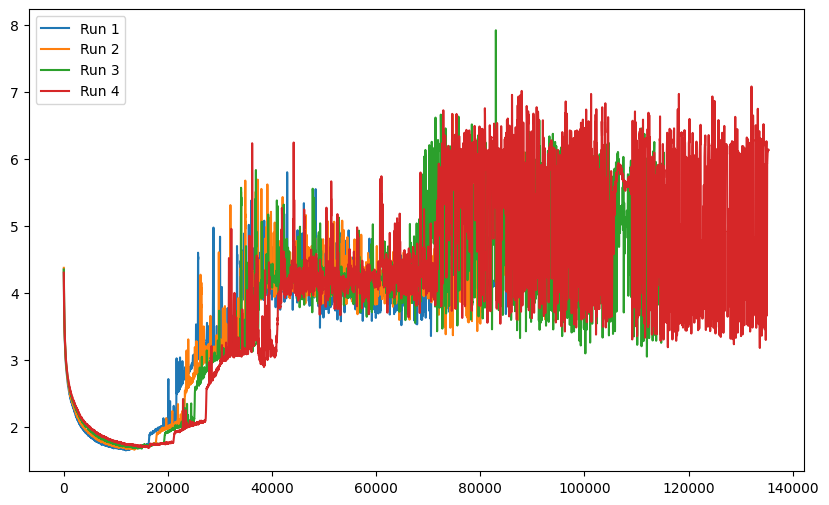

In [23]:
results = []

plt.figure(figsize=(10, 6))
for idx, file in enumerate(sorted(csv_files)):
    df = pd.read_csv(file)

    step_col = "Step"
    loss_col = [col for col in df.columns if "CrossEntropyLoss" in col and "__" not in col][0]

    steps = df[step_col].astype(float).values
    losses = df[loss_col].astype(float).values
    print(losses)
    smoothed = moving_average(losses, window_size)
    print('smoothed', smoothed)
    smoothed_steps = steps[window_size - 1:]  # Align with moving average

    sign_change_step = find_sign_change_step(smoothed_steps, smoothed)
    results.append(sign_change_step)

    label = f"Run {idx + 1}"
    plt.plot(smoothed_steps, smoothed, label=label)

plt.legend()

In [15]:
results

[np.float64(910.0), np.float64(910.0), np.float64(1190.0), np.float64(900.0)]

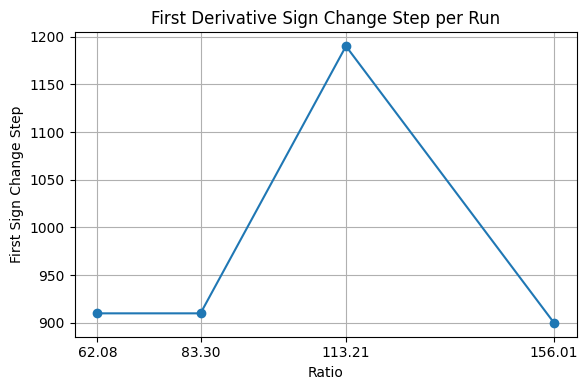

In [16]:

plt.figure(figsize=(6, 4))
plt.plot(ratios_fp6_e2m3_fp6_e3m2, results, marker='o')
plt.xticks(ratios_fp6_e2m3_fp6_e3m2)
plt.xlabel("Ratio")
plt.ylabel("First Sign Change Step")
plt.title("First Derivative Sign Change Step per Run")
plt.grid(True)
plt.tight_layout()
plt.show()